<a href="https://colab.research.google.com/github/jjcheung/ctcuc22/blob/main/APractice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CTCUC 2022 A-level Practice**
Time allowed: Up to 3 hours

**Instructions**

- This practice session is open-book (i.e. books are (mostly) useless).
- Answer all tasks within this Google Colaboratory environment. (You may use your personal IDE as long as the final transferred work is tested in this environment.)
- Start and end a video recording of the screenshare of you working on solving the tasks only.
- Save your work by the end of the 2/3-hour duration.
- Input validation is typically not required unless it is a specified task requirement.
- Appropriate comments are typically required and contribute towards task credit.
- Please note that your programs may need to clear additional test cases to earn full credit.
- Bonus and optional tasks/components contribute extra credit over and above the total marks of 70.
- Upload your video recording to the Google Form https://forms.gle/cAh7Jp3dW5RCQVZK7.

Syllabus: https://www.seab.gov.sg/docs/default-source/national-examinations/syllabus/alevel/2023syllabus/9569_y23_sy.pdf

Quick reference guide: https://drive.google.com/file/d/1WQHI_Kyn0zGsY5aBShTdbYOSuD-kEAgj/view?usp=sharing


Note: If you are opening a file with non-ASCII characters, you may use/adapt the following command:
```
fin = open("INFILE.TXT", "r", encoding="utf-8")
```

Happy learning/coding! :)

##**Task 1**

The file [IOI2019.TXT](https://drive.google.com/file/d/1sOUN9LPm8alFyv98-Rbi0RLq1oKIXcOQ/view?usp=sharing) stores the scoreboard of the 31st International Olympiad in Informatics (IOI) held in Baku, Azerbaijan from 4 to 11 August 2019. The first line contains the header with the following structure:
```
Rank,First Name,Last Name,Team,rect,shoes,split,Day 1,line,vision,walk,Day2,Global
```

###**Task 1.1 [7]**
Write program code to determine to 1 decimal place, the mean (average) and mode (highest occurrence) of each of the 6 tasks.

Sample output
```
Task      Mean    Mode
rect      36.9    100.0
shoes     ...
split     ...
line      ...
vision    ...
walk      ...
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv

task_mean = {
    4: 0, 
    5: 0,
    6: 0,
    8: 0,
    9: 0,
    10: 0
}

task_mode = { #dictionaries of dictionaries to track count
    4: {}, 
    5: {},
    6: {},
    8: {},
    9: {},
    10: {}
}
line_count = 0
with open('/content/drive/MyDrive/Colab Notebooks/IOI2019.TXT') as csv_file:
    lines = csv.reader(csv_file, delimiter=',')
    next(lines, None)
    for row in lines:
        
        line_count += 1
        
        for i in range (len(row)):
            if i in task_mean.keys():
                task_mean[i] += float (row[i])
            if i in task_mode.keys():
                if row[i] in task_mode[i].keys():
                    task_mode[i][row[i]] += 1
                else:
                    task_mode[i][row[i]] = 1

task = ['rect', 'shoes', 'split', 'line', 'vision', 'walk']
mode = []
for k, v in task_mode.items():
    mode.append(max(v, key = v.get))

mean = []
for k, v in task_mean.items():
    mean.append(round(v / line_count, 1))


print('{:10}{:10}{}'.format('Task', 'Mean', 'Mode'))
for i in range (len(task)):
    print ('{:10}{:<10}{:10}'.format(task[i], mean[i], mode[i]))



Task      Mean      Mode
rect      36.9      0         
shoes     74.5      100       
split     26.6      40        
line      41.0      12        
vision    53.4      66        
walk      12.7      0         


In [ ]:
import csv

tasks = {
    'rect':[],
    'shoes':[],
    'split':[],
    'line':[],
    'vision':[],
    'walk':[]
}

def accesstasks(filename):
    with open(filename) as csvfile:
        readf = csv.DictReader(csvfile)
        for row in readf:
            for k, v in tasks.items():
                v.append(float(row[k]))

def mean(lst):
    return sum(lst) / len(lst)

def mode(lst):
    count = {}
    for item in lst:
        if item in count:
            count[item] += 1
        else:
            count[item] = 1
    return max(count, key = count.get)

#main
accesstasks('/content/drive/MyDrive/Colab Notebooks/IOI2019.TXT')
print('{:10}{:10}{}'.format('Task', 'Mean', 'Mode'))
for k, v in tasks.items():
    print ('{:10}{:<10.1f}{:<10}'.format(k, mean(v), mode(v)))

Task      Mean      Mode
rect      36.9      0.0       
shoes     74.5      100.0     
split     26.6      40.0      
line      41.0      12.0      
vision    53.4      66.0      
walk      12.7      0.0       


###**Task 1.2 [8]**

It is decided to order the teams (countries) based on the sum of ranks of the top 3 performers (i.e. smaller is better). Write program code to determine this final order of the teams. Teams which are tied will be ordered by their team names in alphabetical order and will share the same rank. Output the first 5 ordered team names (i.e. 1 to 5) together with the rank sum.

Sample output
```
Order Team RankSum
1     RUS  73
...
5     ...
```

In [ ]:
import csv

rank_count = {}
person_count = {}
with open('/content/drive/MyDrive/Colab Notebooks/IOI2019.TXT') as csv_file:
    lines = csv.reader(csv_file, delimiter=',')
    next(lines, None)
    for row in lines:
        if row[3] in rank_count.keys():
            if person_count[row[3]] < 3:
                rank_count[row[3]] += int(row[0])
                person_count[row[3]] += 1
        else:
            rank_count[row[3]] = int(row[0])
            person_count[row[3]] = 1

rank = []

for k, v in rank_count.items():
    rank.append([v,k])
rank.sort()

print('{:10}{:10}{}'.format('Order', 'Team', 'RankSum'))
for i in range (5):
    print ('{:<10}{:<10}{:<10}'.format(i+1, rank[i][1], rank[i][0]))

Order     Team      RankSum
1         USA       21        
2         CHN       29        
3         RUS       45        
4         IRN       74        
5         KOR       77        


In [ ]:
import csv

rank={}
sortrank = []

def accessfile(fname):
    with open(fname) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            team = row['Team']
            if team in rank.keys() and len(rank[team])<3:
                rank[team].append(int(row['Rank']))
            elif team not in rank.keys():
                rank[team] = [int(row['Rank'])]
    #print(rank)

def sortlist():
    for k, v in rank.items():
        sortrank.append([sum(v),k])
    sortrank.sort()

#main
filename = '/content/drive/MyDrive/Colab Notebooks/IOI2019.TXT'
accessfile(filename)
sortlist()

print('{:10}{:10}{}'.format('Order','Team','Name'))
for i in range(5):
    print('{:<10}{:<10}{}'.format(i+1, sortrank[i][1], sortrank[i][0]))

Order     Team      Name
1         USA       21
2         CHN       29
3         RUS       45
4         IRN       74
5         KOR       77


##**Task 2**

Dubbed first of its kind globally, the Singapore Quick Response Code (SGQR) is an infrastructure-light technology that will help to simplify QR e-payments in Singapore for both consumers and merchants. 

The SGQR is based on the QR Code Specification for Payment System - Merchant-Presented Mode standard issued by EMVCo, which has the benefits of international interoperability, multi-tenancy of QR schemes and non-sensitive data presented for payments.

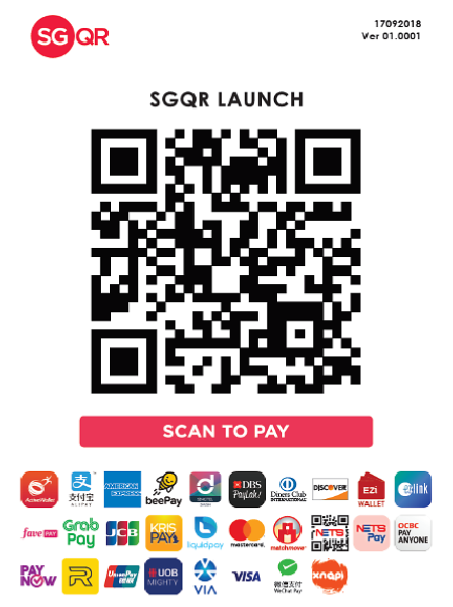

According to the specification, the parsed SGQR text string contains data items, with each data item adhering to the following structure: id, length, value. Two such data items are highlighted in bold:


**000201**01021126810011SG.COM.NETS01231198500065G9912312359000211111686614000308686614019908604108C251800007SG.SGQR01121809072DD85C020701.00010306079027040201050206060400000708201809155204581253037025802SG5912SOBA EXPRESS6009Singapore**630457B3**


Thus for the first data item 000201, 00 is the id, 02 is the length, and 01 is the value.

And for the last data item 630457B3, 63 is the id, 04 is the length, and 57B3 is the value.

The value 57B3 is also a hexadecimal number to verify the integrity of the SGQR data.


###**Task 2.1 [4]**
Write program code to extract the last data item of the SGQR stored in [SGQR.TXT](https://drive.google.com/file/d/1XYKS4nNKvDlMM8NIK2G5YD6bdyVf5i8x/view?usp=sharing). 

For the example above, it will be the data item with id 63 and length 4 i.e. `630457B3`.

In [ ]:
infile = open('/content/drive/MyDrive/Colab Notebooks/SGQR.TXT', 'r') # 'r', 'w', 'a'
string = infile.readlines()
infile.close()

code = ''
i = -1
while string[0][i] != 'P':
    code = string[0][i] + code
    i -= 1
print (code)

63082D6363A7


###**Task 2.2 [6]**
Write an iterative `hex2deci` function which takes in a hexadecimal number string and returns its equivalent decimal number. For example `hex2deci('A')` returns `10`. You may not use Python's built in `int(num, 16)`, `bin()` or `hex()` functions. Use the hexadecimal number string `2D6363A7` to to test your program code.

Hint: One hexadecimal digit can be expressed as four binary digits.


In [ ]:
def hex2deci(hstr):
    total = 0
    hexlist = '0123456789ABCDEF'              #list of hexadecimal values, to be called by relevant indices
    for i in range(len(hstr)):
        total += hexlist.index(hstr[i]) * 16**(len(hstr)-1-i) #hex value x 16^n, where n is determined wrt length of string
    return total

hex2deci('2D6363A7')

761488295

###**Task 2.3 [5]**
Convert your iterative `hex2deci` function to a recursive `hex2decr` one. Verify that your program generates the same output.

In [ ]:
def hex2decr(hstr):
    hexlist = '0123456789ABCDEF' 
    if len(hstr) == 1:
        return hexlist.index(hstr[0])
    return hex2decr(hstr[1:]) + hexlist.index(hstr[0]) * 16 ** (len(hstr) - 1)

# main
hex2decr('2D6363A7')

761488295

##**Task 3**
The data file BOOKS.CSV contains a comprehensive listing of books in Goodreads, a social cataloging website that allows individuals to freely search its database of books, annotations, and reviews. The first line contains the header with the following structure:
```
bookID: A unique Identification number for each book.
title: The name under which the book was published.
authors: Names of the authors of the book. Multiple authors are delimited with -.
average_rating: The average rating of the book received in total.
isbn: Another unique number to identify the book, the International Standard Book Number.
isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
language_code: Helps understand what is the primary language of the book. For instance, eng is standard for English.
# num_pages: Number of pages the book contains.
ratings_count: Total number of ratings the book received.
text_reviews_count: Total number of written text reviews the book received.
```
The International Standard Book Number (ISBN) is a unique identification assigned to each edition of a book. 10 and 13 digits are used before and after 1 Jan 2007 respectively. There are 3 parts to an ISBN:

- group identifier (1 to 5 digits representing country and language)
- publisher code (assigned by national ISBN agency)
- item number (determined by publisher)

The last digit is the check digit (ranging from 0 to X). To determine an ISBN-13 check digit, each digit, starting from the left to right, is multiplied by 1 or 3 alternatively. The sum of products modulo 10 gives either 0 or a number between 1 to 9. Subtract the number from 10 to get the check digit. The following example illustrates the process:

- 9780070635463
- 1x9 + 3x7 + 1x8 + 3x0 + 1x0 + 3x7 + 1x0 + 3x6 + 1x3 + 3x5 + 1x4 + 3x6 => 117
- 117 mod 10 => 7 => 10 - 7 => 3.
- Hence 3 is the check digit.


###**Task 3.1 [7]**

Write a Boolean function `validate_isbn13` which will take in a 13-character string and determine if it is a valid ISBN-13 number. Test your program with the values `9780545010221` and `978038550422X`.

In [ ]:
def validate_isbn13(isbn13):
    total = 0
    for i in range (12):
        if (i+1) % 2 == 0:
            total += 3 * int(isbn13[i])
        else:
            total += int(isbn13[i])
    check = 10 - (total % 10)
    
    if (check == 10 and isbn13[-1] == 'X') or str(check) == isbn13[-1]:
        return True
    else:
        return False 

# main
print(validate_isbn13('9780545010221'))
print(validate_isbn13('978038550422X'))

True
False


###**Task 3.2 [8]**

To determine an ISBN-10 check digit, a weighted system with mod 11 is used. Each digit from left to right is assigned a weight from 1 to 9. Each digit is multiplied by its position weight and the resulting sum of product is accumulated. The following example illustrates the process:

- 0070635463
- (0x1) + (0x2) + (7x3) + (0x4) + (6x5) + (3x6) + (5x7) + (4x8) + (6x9) => 190
- 190 mod 11 => 3
- Hence 3 is the check digit.


Generalise your `validate_isbn13` function to a `validate_isbn` one so that given either a 10- or 13- character string, it can determine if it is a valid ISBN-10 or ISBN-13 number. Test your program with the values `1593074061` and `142150460X`.


In [ ]:
def validate_isbn(isbn):
    total = 0
    if len(isbn) == 10:
        for i in range (9):
            total += int(isbn[i]) * (i+1)
        
        check = total % 11

    elif len(isbn) == 13:
        for i in range (12):
            if (i+1) % 2 == 0:
                total += 3 * int(isbn[i])
            else:
                total += int(isbn[i])
        check = 10 - (total % 10)
        
    if (check == 10 and isbn[-1] == 'X') or str(check) == isbn[-1]:
        return True
    else:
        return False 

# main
print(validate_isbn('1593074061'))
print(validate_isbn('142150460X'))
print(validate_isbn('9780545010221'))
print(validate_isbn('978038550422X'))

False
True
True
False


###**Task 3.3 [8]**

We would like to store the books data using a binary search tree (BST), with `text_reviews_count` as the key in descending order. Each node of the BST will maintain a linked list of books with the same `text_reviews_count` value.


Read the `text_reviews_count` value from [BOOKS.CSV](https://drive.google.com/file/d/1EFf-z1pYineV5_fGo7k6FLNFUkLDcQbL/view?usp=sharing) into an array and sort this array in descending order using merge sort. Output this array as well as the highest `text_reviews_count` value.


In [ ]:
import csv

count = []
highest = 0

with open('/content/drive/MyDrive/Colab Notebooks/BOOKS.CSV') as csv_file:
    lines = csv.reader(csv_file, delimiter=',')
    next(lines, None)
    for row in lines:
        count.append(int(row[-1]))
        highest = max(highest, int(row[-1]))

def merge_sort(A):
    #simplest base case
    if len(A) == 1:
        return A

    #splitting algorithm - splitting the list A into two halves evenly
    mid = len(A) //  2
    front = A[:mid]           
    back = A[mid:]

    #recursive calling - for further splitting before merging
    front = merge_sort(front)
    back = merge_sort(back)
   
    i = 0         #index for front []
    j = 0         #index for back []
    sorted = []   #empty to store sorted values

    #while loop to look for smaller values at the front of each lists
    #append smaller value to sorted list, increment index in same list
    #loops until all values in either list are appended to sorted []
    while (i<len(front)) and (j<len(back)):     
        if front[i] > back[j]:
            sorted.append(front[i])            
            i += 1
        else:
            sorted.append(back[j])
            j += 1

    #add the rest of the elements in the other list to the sorted []
    if i<len(front):
        sorted.extend(front[i:])
    elif j<len(back):
        sorted.extend(back[j:])

     return sorted

print(f'Highest value: {highest}')
array = merge_sort(count)
print (array)

Highest value: 93619
[93619, 84237, 70390, 54668, 54469, 52449, 47291, 45829, 44620, 42096, 42016, 37379, 35316, 34202, 33964, 33535, 33304, 32694, 31664, 31284, 29469, 29367, 27613, 26386, 26249, 25677, 24934, 24622, 24227, 23959, 22826, 21596, 21008, 20994, 20851, 20423, 20192, 20137, 19452, 19368, 19312, 19312, 19025, 18942, 18665, 18499, 18267, 17985, 17497, 17366, 16793, 16773, 16606, 15978, 15978, 15885, 15856, 15763, 15578, 15525, 15400, 15327, 14990, 14874, 14834, 14740, 14689, 14489, 14447, 14441, 14372, 14358, 14267, 14195, 14115, 14102, 14073, 13915, 13699, 13536, 13460, 13316, 13252, 13166, 12837, 12784, 12732, 12648, 12549, 12546, 12402, 12335, 12114, 12100, 12034, 11952, 11714, 11614, 11431, 11396, 11362, 11346, 11194, 11113, 11109, 11074, 11040, 11023, 11005, 10983, 10972, 10789, 10733, 10674, 10669, 10337, 10334, 10321, 10275, 10223, 10210, 10152, 10008, 9943, 9928, 9893, 9878, 9832, 9828, 9827, 9754, 9640, 9618, 9566, 9539, 9501, 9453, 9326, 9284, 9174, 9162, 9159, 914

###**Task 3.4 [9]**

Using object-oriented programming (OOP) techniques, write program code for the classes and initialisation.


In [ ]:
class NodeBooks:
    def __init__(self, data, count):
        self.title = data
        self.count = count
        self.next = None
    
    def display(self):
        print (self.title)

class LinkedList:
    def __init__(self, count):
        self.head = None
        self.count = count

    def review_count(self):
        return self.count
        
    def insert(self, data, count):
        temp = NodeBooks(data, count)
        if self.head == None:
            self.head = temp
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = temp
    
    def display(self):
        current = self.head
        while current:
            current.display()
            current = current.next
"""
ll = LinkedList(0)
ll.insert('Book1')
ll.insert('Book2')
ll.insert('Book3')
ll.display()
"""

"\nll = LinkedList(0)\nll.insert('Book1')\nll.insert('Book2')\nll.insert('Book3')\nll.display()\n"

###**Task 3.5 [8]**

Write program code to insert the data from [BOOKS.CSV](https://drive.google.com/file/d/1EFf-z1pYineV5_fGo7k6FLNFUkLDcQbL/view?usp=sharing) into your defined data structure and determine the height of your BST.


In [ ]:
class BST:

    def __init__(self, name, value):
        self.llist = LinkedList(value)
        self.llist.insert(name, value)
        self.left = None
        self.right = None

    def insert(self, name, value):
        if value == self.llist.review_count():
            self.llist.insert(name,value)
        elif value < self.llist.review_count(): # comparing with root
            if self.left is None: # can insert as left leaf node
                self.left = BST(name, value)
            else: # recursively insert to left subtree
                self.left.insert(name, value)
        else: # value > self.data
            if self.right is None: # can insert as right leaf node
                self.right = BST(name, value)
            else: # recursively insert to right subtree
                self.right.insert(name, value)      

    def search(self, target):
        if self.llist.review_count() == target: # success
            self.llist.display()
            return "Found"
        elif self.left is None and self.right is None: # unsuccessful / leaf
            return "Not found"
        elif target < self.llist.review_count() : # go left
            if self.left is None: # node with no left child or 1 right child
                return "Not found"
            else: # left subtree exists
                return self.left.search(target) # recursive 1 go left
        else: # target > self.data: # go right
            if self.right is None: # node with no right child or 1 left child
                return "Not found"
            else: # right subtree exists
                return self.right.search(target) # recursive 2 go right        

    def lookup(self, target, parent=None):
        if self.llist.review_count() == target: # terminating case found
            # return current node and its parent
            return self, parent
        elif target < self.llist.review_count() : # go left
            if self.left is None: # no left subtree
                return None, None
            else: 
                return self.left.lookup(target, self)
        else: # target > self.data / go right
            if self.right is None: # no right subtree
                return None, None
            else: 
                return self.right.lookup(target, self)


    def update(self, old, new):
        self.delete(old)
        self.insert(new)

    def inorder(self): # left root right
        if self.left: # recursive 1: go left because left subtree exists
            self.left.inorder()
        print(self.llist.review_count() , end=' ') # anchor/terminating case
        if self.right: # recursive 2: go right because right subtree exists
            self.right.inorder()

    def preorder(self): # root left right
        print(self.llist.review_count() , end=' ') # anchor/terminating case  
        if self.left: # recursive 1: go left because left subtree exists
            self.left.preorder()
        if self.right: # recursive 2: go right because right subtree exists
            self.right.preorder()

    def postorder(self): # left right root 
        if self.left: # recursive 1: go left because left subtree exists
            self.left.postorder()
        if self.right: # recursive 2: go right because right subtree exists
            self.right.postorder()
        print(self.llist.review_count() , end=' ') # anchor/terminating case  

    def reverse(self): # right root left 
        if self.right: # recursive 2: go right because right subtree exists
            self.right.reverse()
        print(self.llist.review_count(), end=' ') # anchor/terminating case 
        if self.left: # recursive 1: go left because left subtree exists
            self.left.reverse()

    def minimum(self):
        if self.left is None: # leftmost
            print(self.llist.review_count() )
        else:
            self.left.minimum()

    def maximum(self):
        if self.right is None: # rightmost
            print(self.llist.review_count())
        else:
            self.right.maximum()

    def maxht(self):
        if self.left == None and self.right == None:
            return 1
        elif self.left != None and self.right == None:
            return 1 + self.left.maxht()
        elif self.left == None and self.right != None:
            return 1 + self.right.maxht()
        else:
            return 1 + max(self.left.maxht(), self.right.maxht())

In [ ]:
import csv


with open('/content/drive/MyDrive/Colab Notebooks/BOOKS.CSV') as csv_file:
    lines = csv.DictReader(csv_file)
    #next(lines, None)
    firstrow = True
    for row in lines:
        if firstrow:
            bst = BST(row['title'], int(row['text_reviews_count']))
            firstrow= False
        else:
            bst.insert(row['title'], int(row['text_reviews_count']))

bst.inorder()
print()
print(f'Height of BST = {bst.maxht()}')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

##**Task 4 [Bonus][10]**
Design a task showing the application of programming constructs (data types, conditionals, iteration, functions, arrays, data structures and algorithms, OOP, etc.) in the A-level syllabus with the program output as `23`.

In [ ]:
# Program output is 23


###**Extra Bonus 1 [10]**
A magic square has every row, column, and diagonal sum to the same number. Using 2D arrays, write program code to generate all possible 3x3 magic squares. The following shows one such possibility:


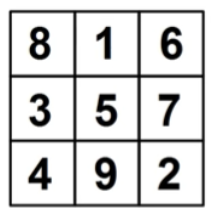

Hint: Each row, column and diagonal sums up to 15 and there are 8 possibilities. :)


In [ ]:
array = {}
for i in range (1, 10):
    array[i]=[]
    for j in range (1, 10):
        k = 15 - i - j
        if i != j and i!= k and j!=k and (1<=k<=9):
            node = [i, j, k]
            array[i].append(node)
#print(array)
results = []
for k, v in array.items():
    for i in range (len(v)):
        n12 = v[i][1]
        n13 = v[i][2]
        for j in range (len(v)):
            if i!=j:
                n21 = v[j][1]
                n31 = v[j][2]
                for n22 in range (1, 10):
                            
                    n23 = 15 - n21 - n22
                    n32 = 15 - n22 - n12
                    n33 = 15 - n32 - n31
                    check = v[i] + [n21, n22, n23, n31, n32, n33]

                    if len(set(check))==len(check) and (k+n22+n33 == 15) and (n31 + n22 + n13 == 15) and (n13 + n23 + n33 == 15) and (n21+n22+n23 == 15) and (n31 + n32 + n33 == 15):
                        node1 = [n21, n22, n23]
                        node2 = [n31, n32, n33] 
                        results.append([v[i], node1, node2])

for i in results:
    for j in i:
        print(j)
    print()

[2, 7, 6]
[9, 5, 1]
[4, 3, 8]

[2, 9, 4]
[7, 5, 3]
[6, 1, 8]

[4, 3, 8]
[9, 5, 1]
[2, 7, 6]

[4, 9, 2]
[3, 5, 7]
[8, 1, 6]

[6, 1, 8]
[7, 5, 3]
[2, 9, 4]

[6, 7, 2]
[1, 5, 9]
[8, 3, 4]

[8, 1, 6]
[3, 5, 7]
[4, 9, 2]

[8, 3, 4]
[1, 5, 9]
[6, 7, 2]



###**Extra Bonus 2 [10]**
Write program code to display a greeting message for a randomly assigned game character from the file [GAME.TXT](https://drive.google.com/file/d/1R7tBUXlLMcM0jbLWHvCBQ6La4uc0b56I/view?usp=sharing) with 0.7 probability that a user will be assigned the first character. Run your program 100 times and output the percentage the first character is displayed to the nearest integer. 

Expected output: 
```
Hi <first_game_character>! occurs 69%. 
```

In [ ]:
# Reading from text file

import random
character = []


infile = open('/content/drive/MyDrive/Colab Notebooks/GAME.TXT', 'r') # 'r', 'w', 'a'

lines = infile.readlines()
for line in lines:
    character.append(line[0])

infile.close()

def assign_char():
    num = random.randint(1,10)
    if 1 <= num <= 7:
        return character [0]
    else:
        return character [1]

#main
count = 0
for i in range(100):
    if assign_char() == character [0]:
        count +=1

print(f'Hi! {character[0]} occurred {count}%.')

Hi! 猫 occurred 64%.
